<a href="https://colab.research.google.com/github/Sanjana-Sarma/NTTF_Training/blob/main/Exercise61_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from google.colab import files
from sklearn.decomposition import PCA
import seaborn as sns

In [2]:
uploaded=files.upload()

Saving german_credit_data.csv to german_credit_data.csv


In [35]:
df_=pd.read_csv('german_credit_data.csv')
df=df_
df_.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [36]:
df.drop(columns=['Unnamed: 0'], inplace=True)
print(df.dtypes)
df.head()

Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
dtype: object


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [37]:
df.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

In [38]:
numerical = ['Credit amount','Age','Duration']
categorical = ['Sex','Job','Housing','Saving accounts','Checking account','Purpose']
for cat in categorical:
    df[cat] = df[cat].fillna(df[cat].mode().values[0])


In [39]:
df.isnull().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
dtype: int64

In [40]:
cluster_df=df
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,little,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,little,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [41]:
df['Saving accounts'].value_counts()

little        786
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64

In [42]:
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])
df['Saving accounts']=le.fit_transform(df['Saving accounts'])
df['Checking account']=le.fit_transform(df['Checking account'])
df=pd.get_dummies(df, columns=['Housing','Purpose'])
df.dropna(inplace=True)
print(df.dtypes)
df.head()

Age                            int64
Sex                            int64
Job                            int64
Saving accounts                int64
Checking account               int64
Credit amount                  int64
Duration                       int64
Housing_free                   uint8
Housing_own                    uint8
Housing_rent                   uint8
Purpose_business               uint8
Purpose_car                    uint8
Purpose_domestic appliances    uint8
Purpose_education              uint8
Purpose_furniture/equipment    uint8
Purpose_radio/TV               uint8
Purpose_repairs                uint8
Purpose_vacation/others        uint8
dtype: object


,Age,Sex,Job,Saving accounts,Checking account,Credit amount,Duration,Housing_free,Housing_own,Housing_rent,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,67,1,2,0,0,1169,6,0,1,0,0,0,0,0,0,1,0,0
1,22,0,2,0,1,5951,48,0,1,0,0,0,0,0,0,1,0,0
2,49,1,1,0,0,2096,12,0,1,0,0,0,0,1,0,0,0,0
3,45,1,2,0,0,7882,42,1,0,0,0,0,0,0,1,0,0,0
4,53,1,2,0,0,4870,24,1,0,0,0,1,0,0,0,0,0,0


In [43]:
scaler=StandardScaler()
data=df
data['Age']=scaler.fit_transform(data[['Age']])
data['Job']=scaler.fit_transform(data[['Job']])
data['Credit amount']=scaler.fit_transform(data[['Credit amount']])
data['Duration']=scaler.fit_transform(data[['Duration']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

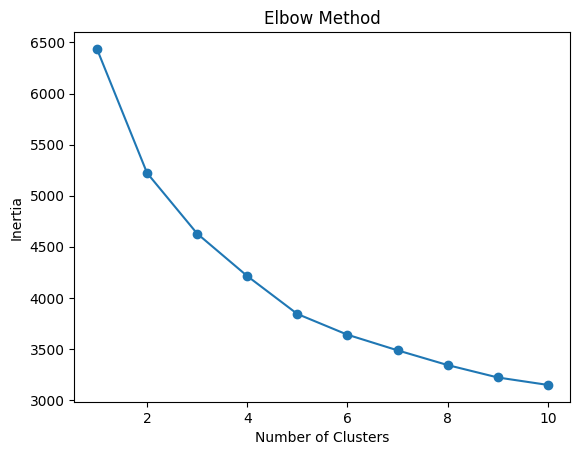

In [44]:
# Use the Elbow Method to find the optimal number of clusters
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [48]:
# Apply K-Means clustering
num_clusters = 5  # Adjust based on your Elbow Method results
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(data)

# Add the cluster labels to the original dataset
data['Cluster'] = clusters
df['Cluster']=clusters
cluster_df['Cluster']=clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


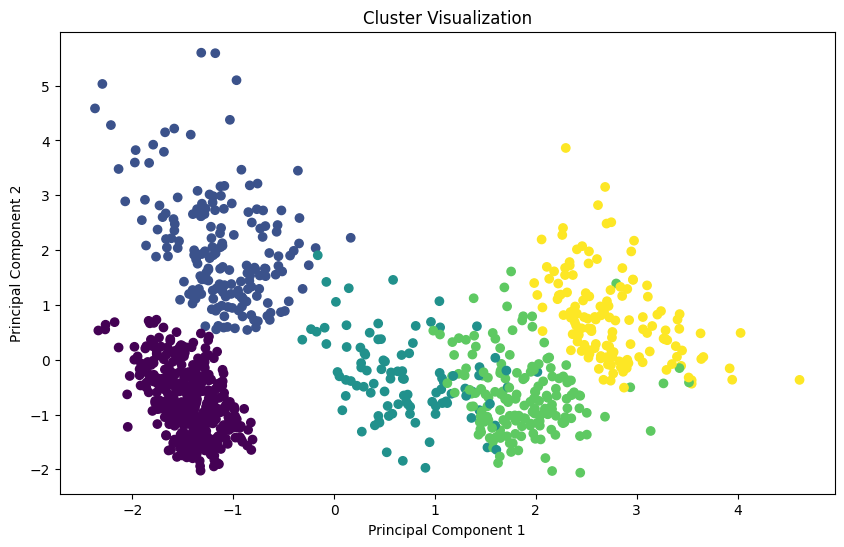

In [49]:
# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(data)

# Create a scatter plot to visualize clusters
plt.figure(figsize=(10, 6))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=clusters, cmap='viridis')
plt.title('Cluster Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [50]:
unique_clusters = cluster_df['Cluster'].unique()

# Create a dictionary to store datasets for each cluster
cluster_datasets = {}

# Iterate through each cluster
for cluster_label in unique_clusters:
    # Filter the data for the current cluster
    cluster_data = cluster_df[cluster_df['Cluster'] == cluster_label]

    # Store the filtered data in the dictionary with a key indicating the cluster label
    cluster_datasets[f'Cluster_{cluster_label}'] = cluster_data

In [ ]:
for cluster_label, cluster_data in cluster_datasets.items():
  for feature in cluster_data.columns:
    if feature == 'Cluster':
      continue

    plt.figure(figsize=(7, 3))
    if cluster_data[feature].dtype == 'float64' or cluster_data[feature].dtype == 'int64':
        sns.histplot(cluster_data[feature], kde=True)
        plt.xlabel(feature)
        plt.ylabel('Frequency')
        plt.title(f'{feature} Distribution in {cluster_label}')
    else:
        sns.countplot(x=feature, data=cluster_data)
        plt.xlabel(feature)
        plt.ylabel('Count')
        plt.title(f'{feature} Counts in {cluster_label}')

    plt.show()

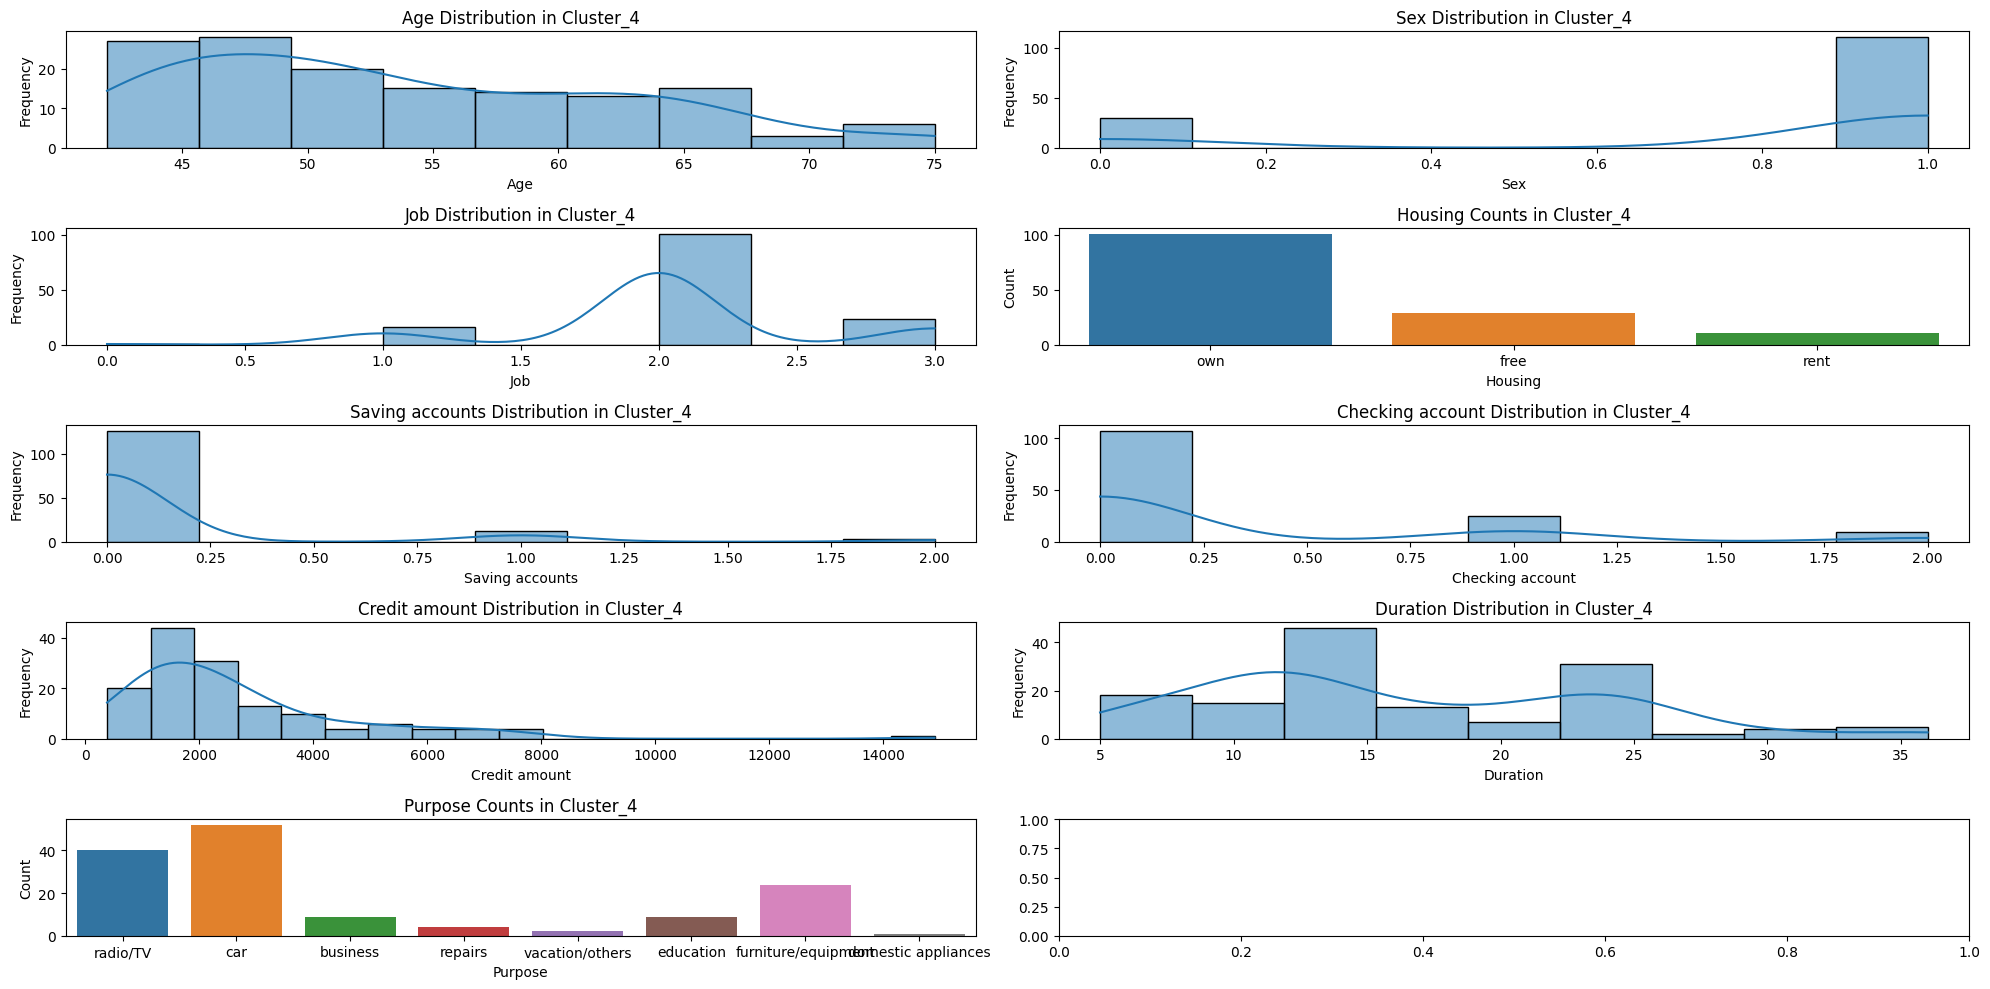

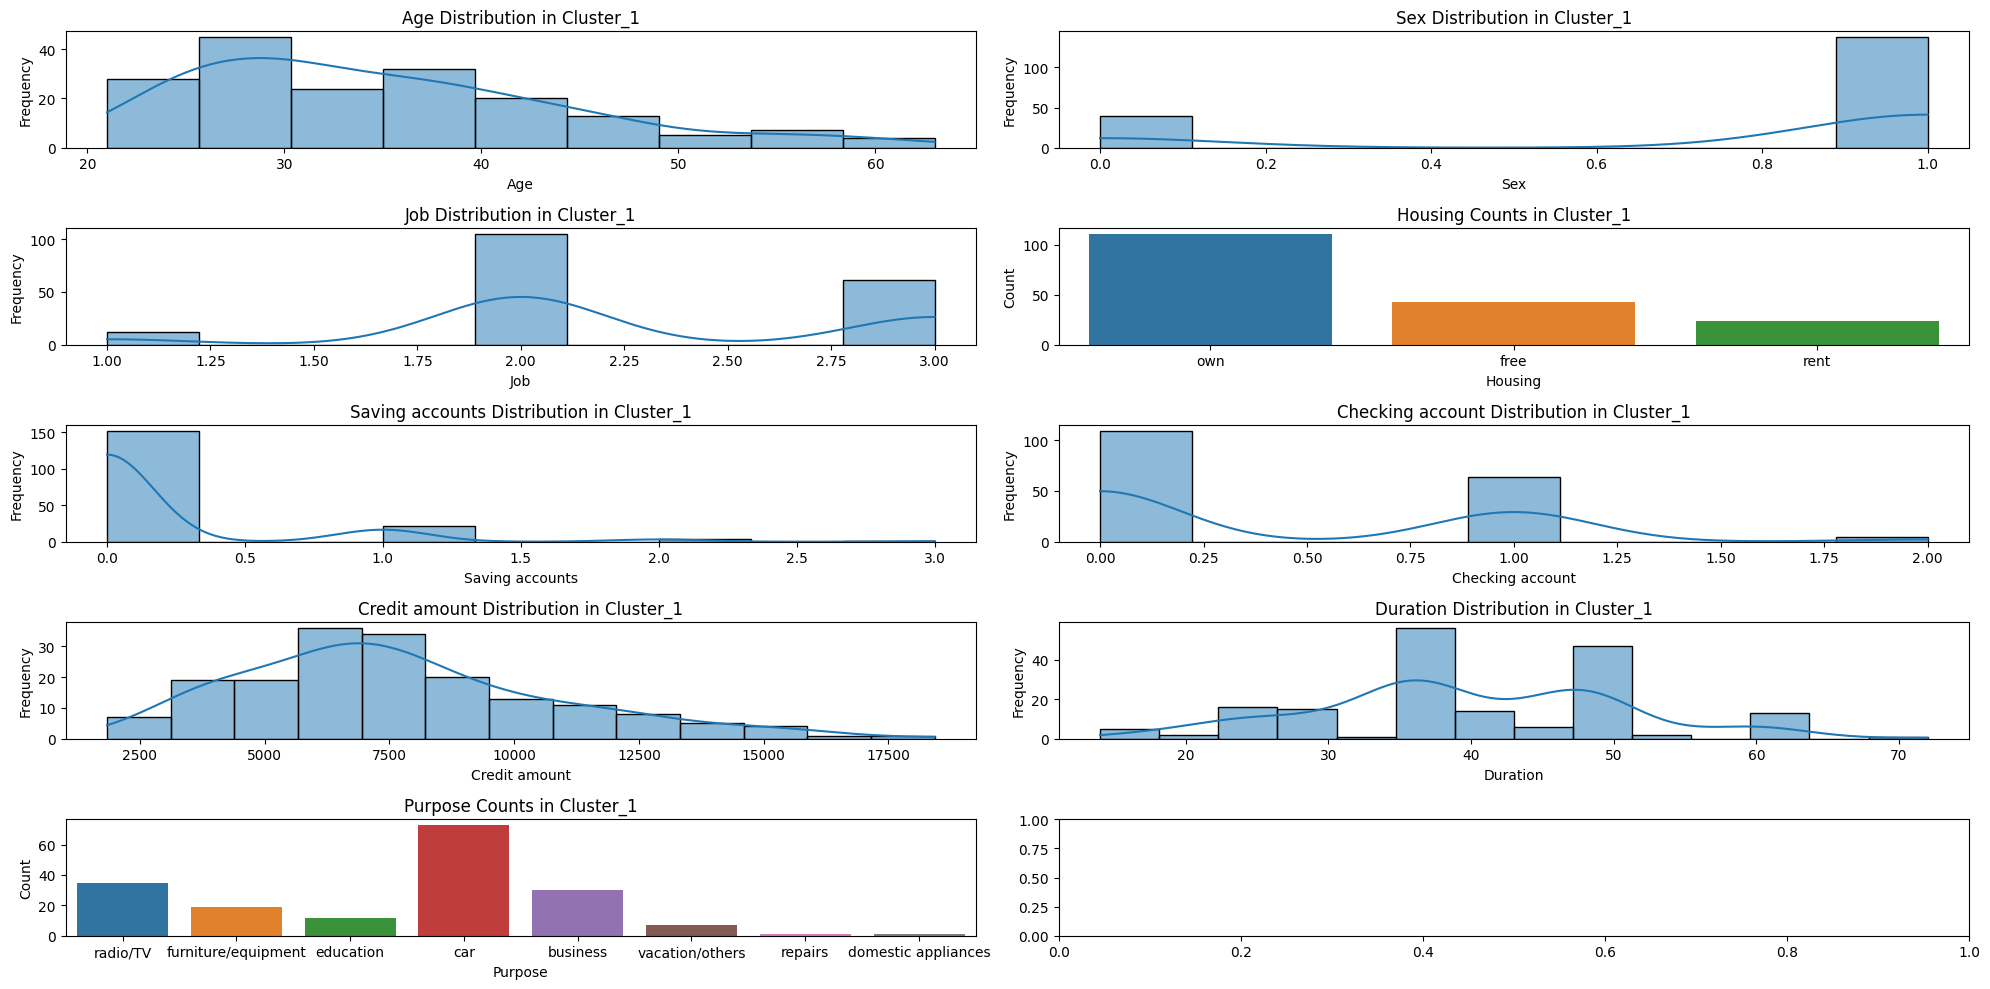

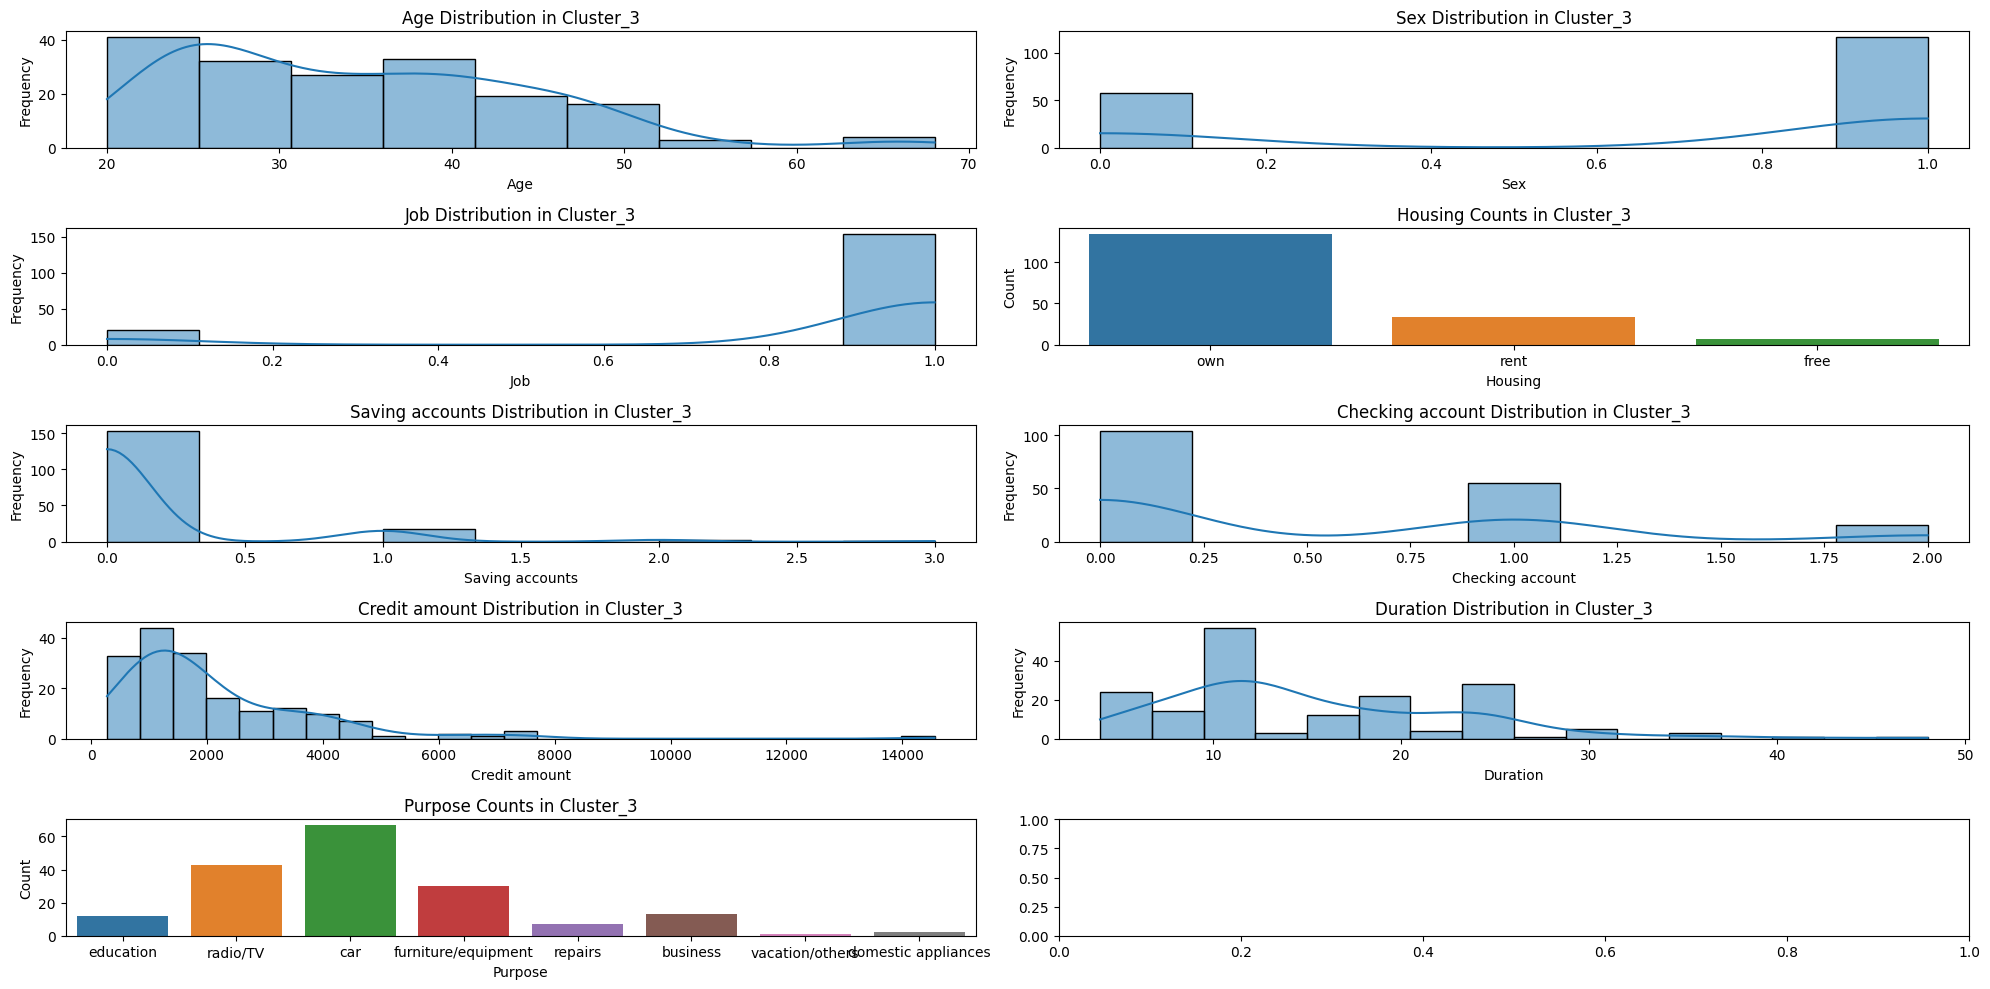

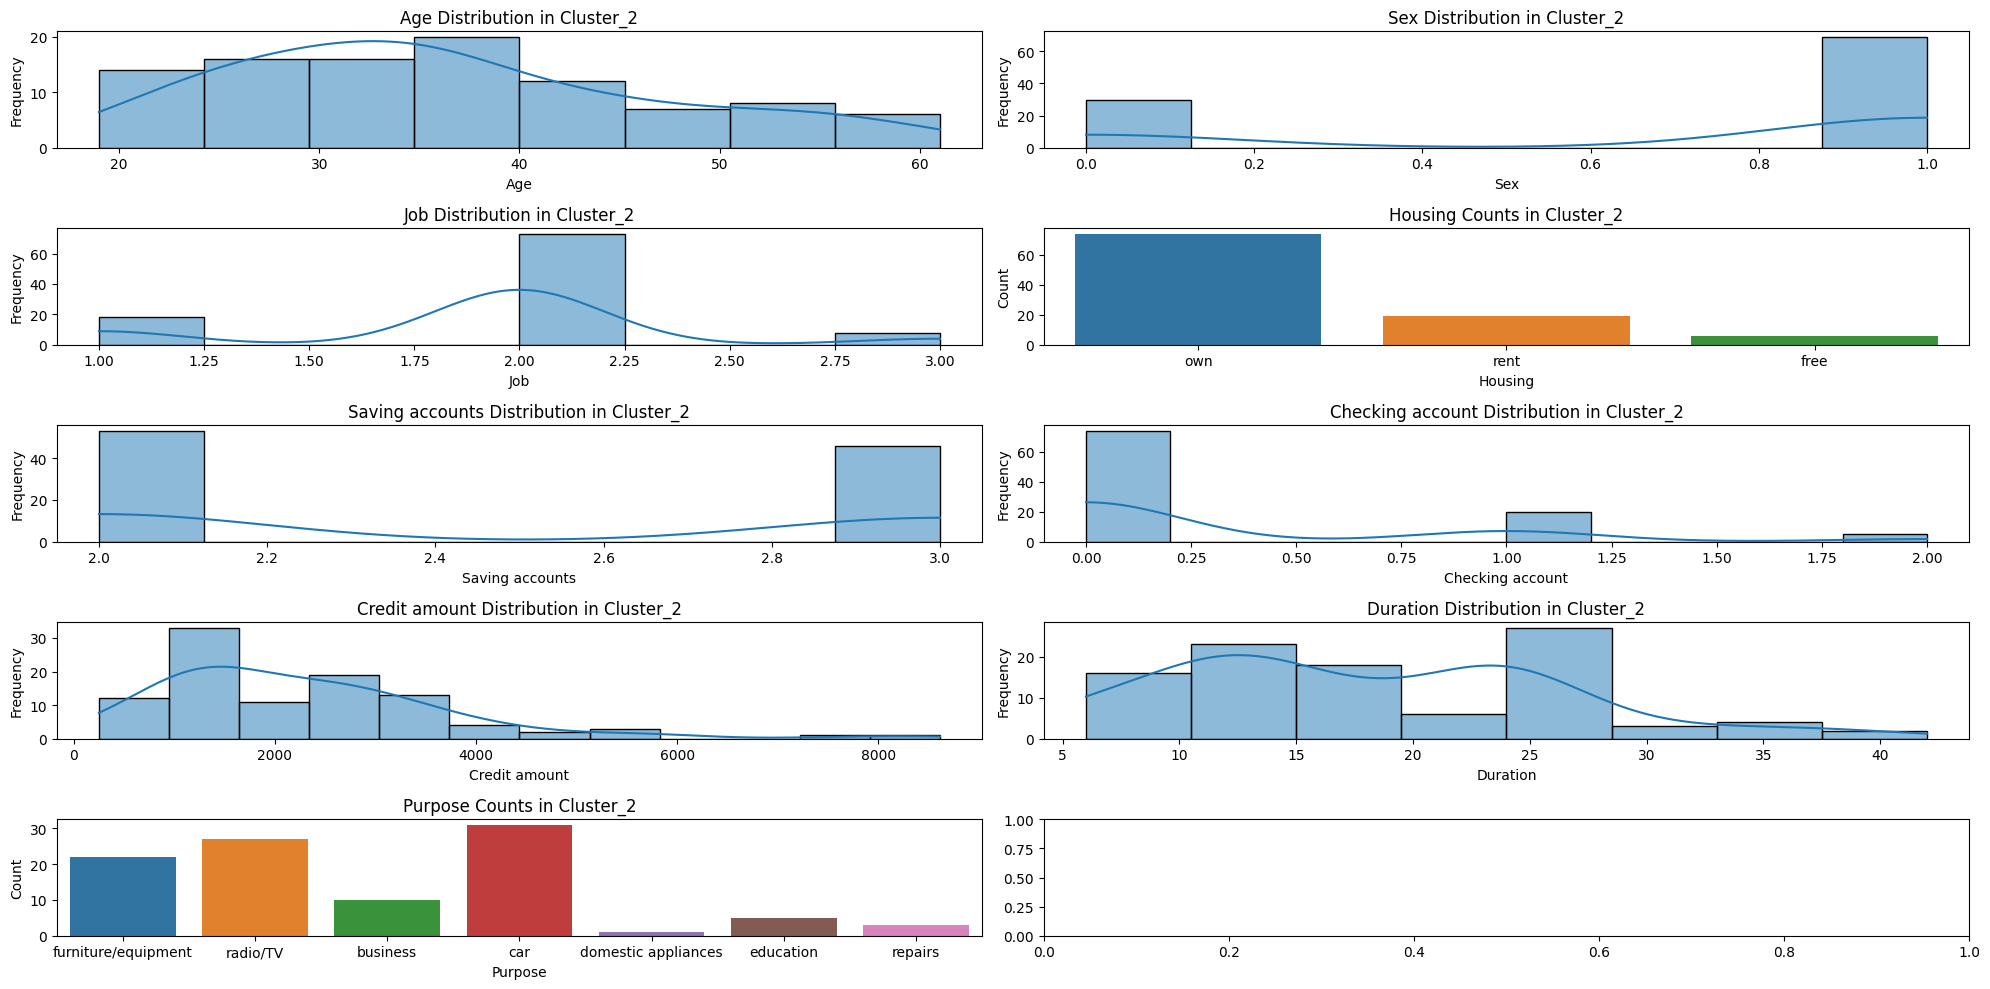

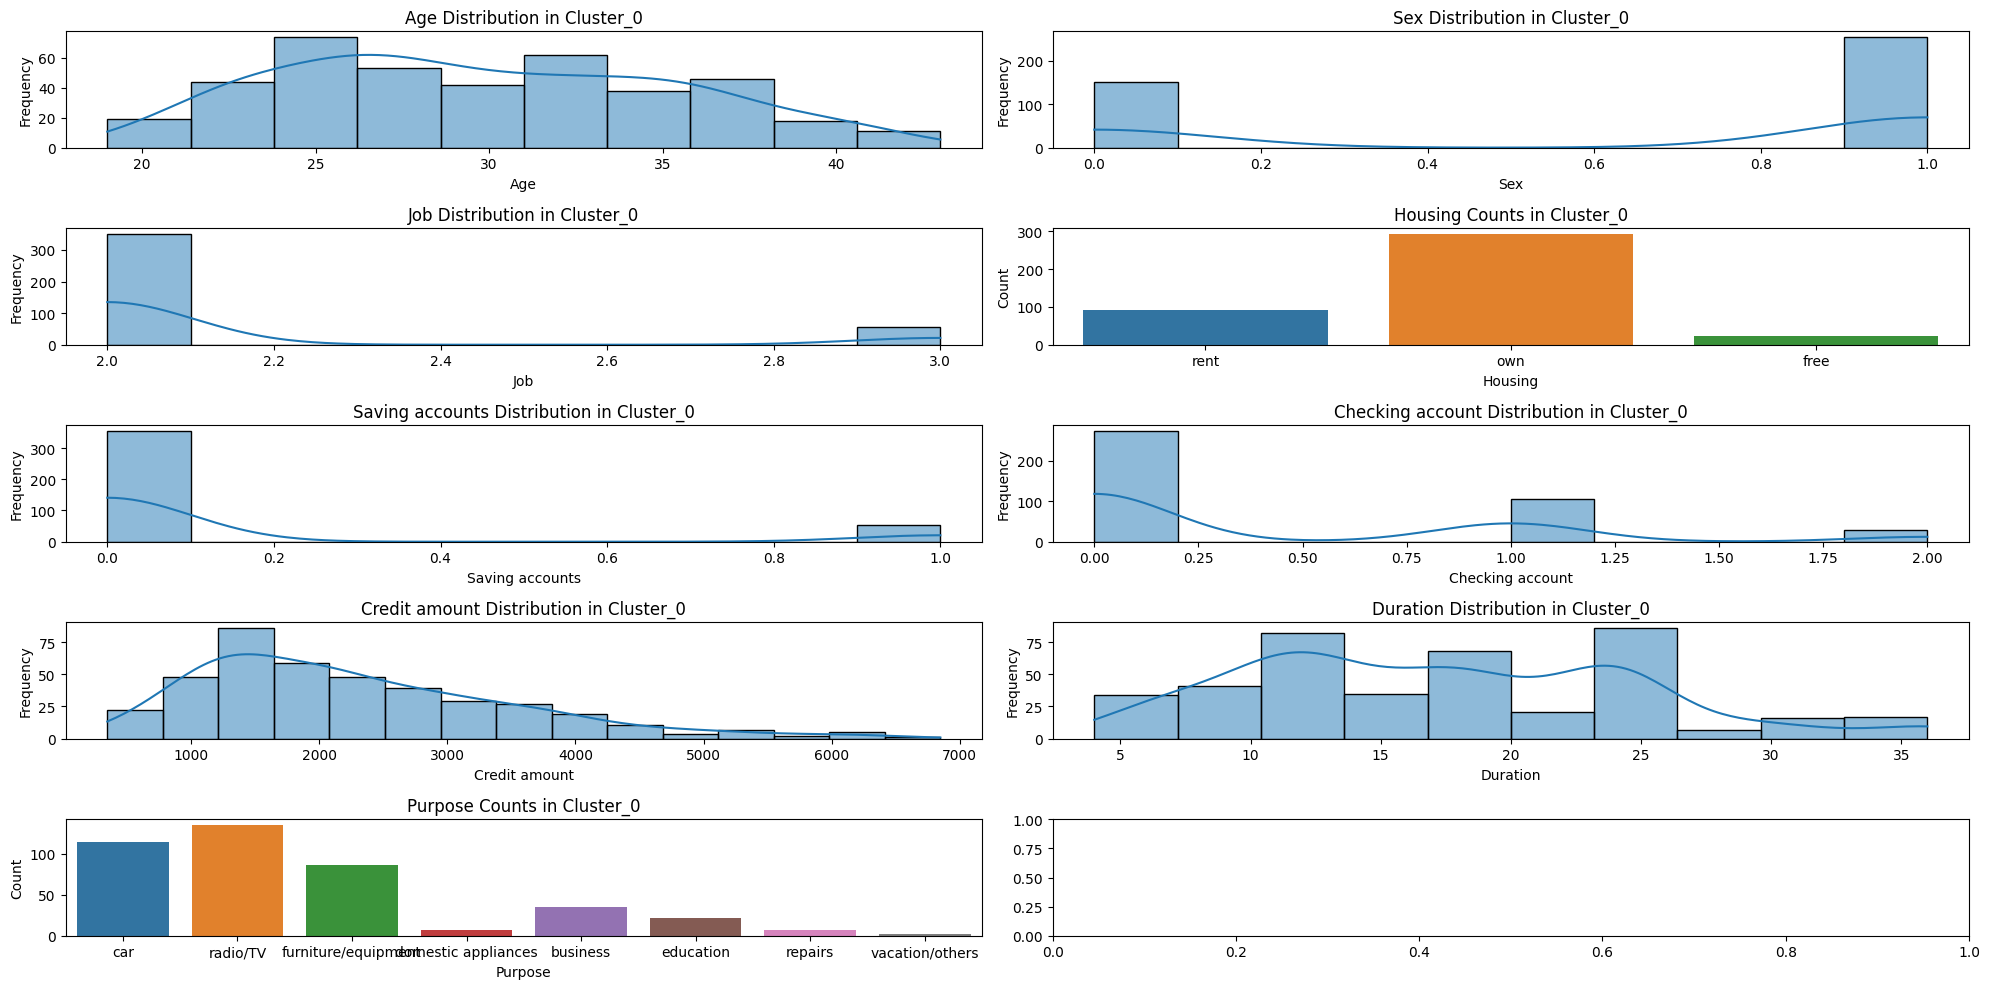

In [56]:
# Iterate through each cluster dataset
for cluster_label, cluster_data in cluster_datasets.items():
    num_features = len(cluster_data.columns) - 1  # Exclude the 'Cluster' column
    num_rows = (num_features + 1) // 2  # Two plots per row
    num_cols = 2  # Two columns
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))
    axes = axes.flatten()
    for i, feature in enumerate(cluster_data.columns):
        if feature == 'Cluster':
            continue
        # Determine the subplot location
        row = i // num_cols
        col = i % num_cols

        # Create plots (e.g., histograms, box plots, bar charts) for each feature
        if cluster_data[feature].dtype == 'float64' or cluster_data[feature].dtype == 'int64':
            sns.histplot(cluster_data[feature], kde=True, ax=axes[i])
            axes[i].set_xlabel(feature)
            axes[i].set_ylabel('Frequency')
            axes[i].set_title(f'{feature} Distribution in {cluster_label}')
        else:
            sns.countplot(x=feature, data=cluster_data, ax=axes[i])
            axes[i].set_xlabel(feature)
            axes[i].set_ylabel('Count')
            axes[i].set_title(f'{feature} Counts in {cluster_label}')
    plt.tight_layout()
    plt.show()
